In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

def lst_sq(predictions, target):
    return 0.5 * np.sum((predictions - target)**2)

<IPython.core.display.Javascript object>


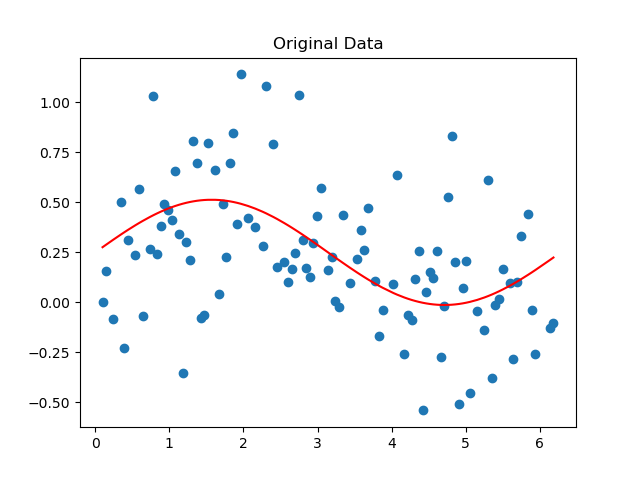

In [62]:
# Generate a bias term and slope between -1 and 1
b = (np.random.rand() * 2) - 1
m = (np.random.rand() * 2) - 1
noise_weight = 0.3

num_samples = 128
x = np.array(list(range(num_samples)), dtype=np.float32)
x = x / num_samples * 2 * math.pi

# Set aside some samples for validation
val_idxs = np.random.choice(num_samples, 28)
idxs = np.array(list(range(num_samples)))
train_idxs = np.in1d(idxs, val_idxs)
train_idxs = ~train_idxs

y = m * np.sin(x) + b + (noise_weight * np.random.randn(num_samples))

# Split the datasets
x_val = x[val_idxs]
x = x[train_idxs]
num_train = x.shape[0]
y_val = y[val_idxs]
y = y[train_idxs]
num_val = len(val_idxs)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y)
ax.plot(x, m * np.sin(x) + b, c='r')
ax.set_title("Original Data");

Error = 4.394537915108251
Error = 2.1560329805150387
24.314540746697958


<IPython.core.display.Javascript object>


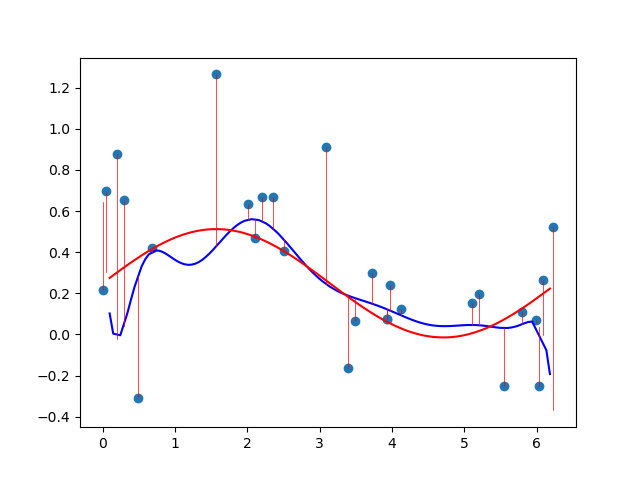

In [67]:
dof = 11
regularization = 0
data = np.repeat(x[:, None], dof, axis=1)
data = np.hstack((np.ones((x.shape[0], 1)), data))
for i in range(1, dof):
    data[:, i+1] = data[:, 1]**(i+1)

w = np.linalg.inv(regularization * np.eye(data.shape[1]) + data.T @ data) @ (data.T @ y)

# Recompute the new  y-values for visualization
y_hat_train = data @ w
error = lst_sq(y_hat_train, y)
print("Error =", error)

# validation
data_val = np.repeat(x_val[:, None], dof, axis=1)
data_val = np.hstack((np.ones((x_val.shape[0], 1)), data_val))
for i in range(1, dof):
    data_val[:, i+1] = data_val[:, 1]**(i+1)
    
# Recompute the new  y-values for visualization
y_hat_val = data_val @ w
error = lst_sq(y_hat_val, y_val)
print("Error =", error)

# Show the weights of the model
print(np.abs(w).mean())

# Visualize the new solution
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_val, y_val)
ax.plot(x, y_hat_train, c='b')
ax.plot(x, m * np.sin(x) + b, c='r')
for i in range(len(val_idxs)):
    ax.plot([x_val[i], x_val[i]], [y_val[i], y_hat_val[i]], c='r', linewidth=0.5)